In [1]:
#%matplotlib notebook
%matplotlib inline

# Importación de Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import preprocessing

# Establecimiento estático de Números aleatorios

In [3]:
np.random.seed(5)

# Carga y Transformación de DataSet

## Carga de Datos
Para las pruebas se eligio el siguiente dataset para hacer la demostración https://www.datosabiertos.gob.pe/dataset/fallecidos-por-covid-19-ministerio-de-salud-minsa el día 26 de junio del 2020

In [4]:
data = pd.read_csv('fallecidos_covid.csv',  encoding = "ISO-8859-1",)
data = data.dropna()
x_label = "DEPARTAMENTO"
y_label = "EDAD_DECLARADA"
data

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
756,b4c0d4fe0aa829fcb1e37d64051eb14e,19/03/2020,78,MASCULINO,13/10/1941,LIMA,LIMA,SANTIAGO DE SURCO
757,af7021c25875f08b35d13c7b95502cd8,19/03/2020,69,MASCULINO,5/03/1951,LIMA,LIMA,MIRAFLORES
758,14429b95af0c0dab7dbd587386e82656,19/03/2020,45,MASCULINO,30/06/1974,LIMA,LIMA,RIMAC
759,bb70d1497af53df69c89faf51fd63673,20/03/2020,76,FEMENINO,27/12/1944,LIMA,LIMA,SAN JUAN DE LURIGANCHO
760,5a7a6b7221658bcc9e4cb028663a5068,21/03/2020,83,MASCULINO,17/08/1939,PIURA,SULLANA,MARCAVELICA
...,...,...,...,...,...,...,...,...
9312,ca5647f001d54b8185f71dc815937467,1/06/2020,60,MASCULINO,24/04/1960,AMAZONAS,UTCUBAMBA,BAGUA GRANDE
9313,f9a5cacd8f4699a62d7c34de2f5ff6ed,2/06/2020,52,MASCULINO,13/06/1967,AMAZONAS,BAGUA,BAGUA
9314,57230063d7720d64c940aef96eb3d162,2/06/2020,77,FEMENINO,7/09/1942,AMAZONAS,UTCUBAMBA,BAGUA GRANDE
9315,ccb8f0c768333452fb90322abb5a566a,3/06/2020,80,MASCULINO,10/03/1940,AMAZONAS,UTCUBAMBA,BAGUA GRANDE


## Transformación de datos

### Eliminación de datos no necesarios

In [5]:
del data['FECHA_FALLECIMIENTO']
del data['SEXO']
del data['FECHA_NAC']
del data['PROVINCIA']
del data['DISTRITO']
del data['UUID']
data

,EDAD_DECLARADA,DEPARTAMENTO
756,78,LIMA
757,69,LIMA
758,45,LIMA
759,76,LIMA
760,83,PIURA
...,...,...
9312,60,AMAZONAS
9313,52,AMAZONAS
9314,77,AMAZONAS
9315,80,AMAZONAS


### Agrupamiento de Datos

In [6]:
data = data.groupby([x_label, y_label])[y_label].agg(['count'])
data.reset_index(inplace=True)  
data

,DEPARTAMENTO,EDAD_DECLARADA,count
0,AMAZONAS,27,1
1,AMAZONAS,31,1
2,AMAZONAS,35,2
3,AMAZONAS,36,1
4,AMAZONAS,49,1
...,...,...,...
1005,UCAYALI,79,2
1006,UCAYALI,80,3
1007,UCAYALI,82,1
1008,UCAYALI,85,2


In [7]:
u, ind = np.unique(data[x_label], return_inverse=True)
data[x_label] = ind

# Ejecución del Algoritmo

## Metodo para obtener nivecels de un dataframe segun cantidad de clustera

In [8]:
def get_levels(cluster, data):
    est = KMeans(n_clusters=cluster)
    x = data.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    est.fit(x)    
    return est.labels_

## Arreglo de cantidad de cluster por ejecución

In [9]:
clusters = range(2, 12)

## Ejecución

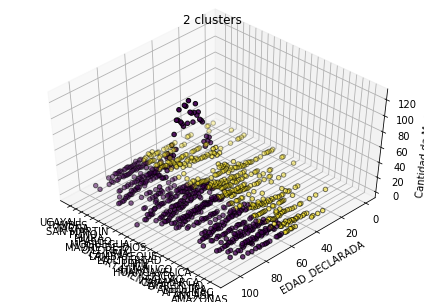

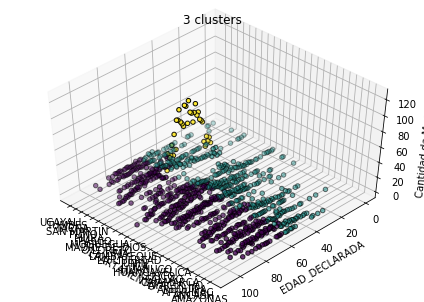

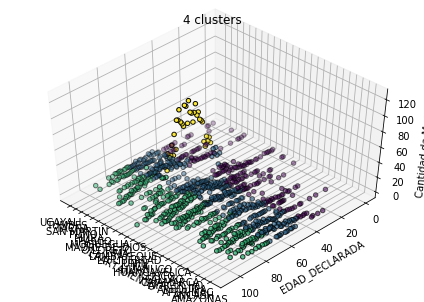

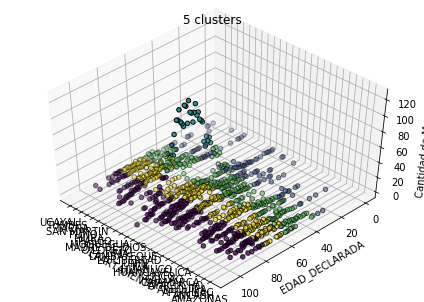

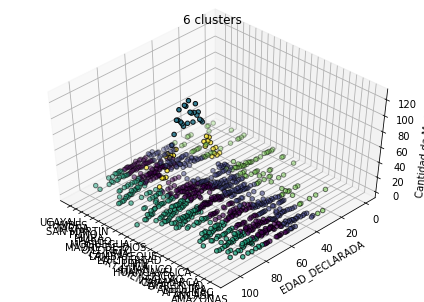

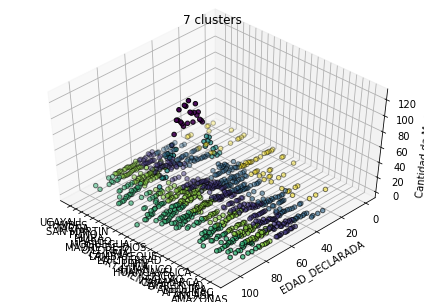

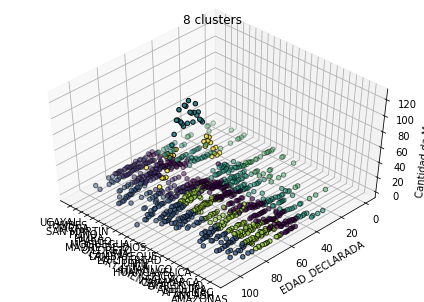

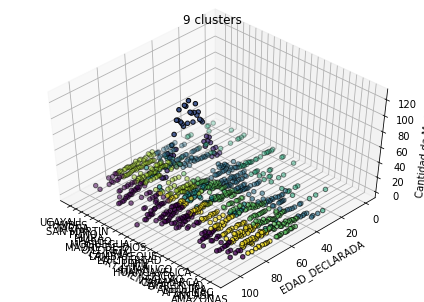

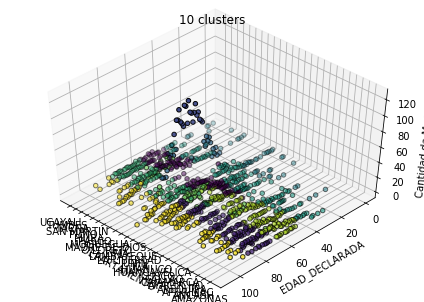

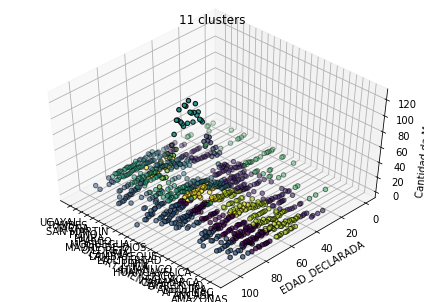

In [10]:
for cluster in clusters:
    fig, ax = plt.subplots()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    ax.scatter(data[x_label], data[y_label], data['count'], c=(get_levels(cluster, data)).astype(np.float), edgecolor='k')
    new_labels = plt.xticks(range(len(u)), u)
    ax.set_title(str(cluster) + " clusters")
    ax.set(xlabel = x_label, ylabel=y_label, zlabel='Cantidad de Muertes')